In [1]:
%load_ext autoreload
%autoreload 2

from ETL import *

In /opt/anaconda2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/anaconda2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/anaconda2/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mpl

# Small sensors

As an example, let's build modules, readout boards and power boards for small sensors.
A small sensor consists of 16x16 pads, and measures 21.75 x 22mm, with a 0.5mm wide dead area all around the sensor.

2x2 sensors will be placed on one module, with a gap of 0.1mm between them.

This is a baseline, but we can investigate how the efficiency hit efficiency is impacted if the sensor gaps and/or module gaps are changed


In [2]:
sensor_x = 21.75
sensor_y = 22
sensor_gap_x = 0.1
sensor_gap_y = 0.5
module_x = 0.6 + 2*sensor_x + sensor_gap_x
module_y = 56.50

s = Sensor(sensor_x, sensor_y, deadspace=0.5)

m = Module(module_x, module_y,
           n_sensor_x = 2,
           n_sensor_y = 2,
           sensor_distance_y = sensor_y + sensor_gap_y,
           sensor_distance_x=sensor_x+sensor_gap_x
          )

# populate the module with sensors
m.populate(s)

# create some readout and power boards.
# The x dimension will be aligned later on, so we just use a dummy value of 10mm.

rb = ReadoutBoard(10, module_y, color='green')
pb = ReadoutBoard(10,29.5, color='red')


We can look at one module to see if we didn't screw up any dimenstions.

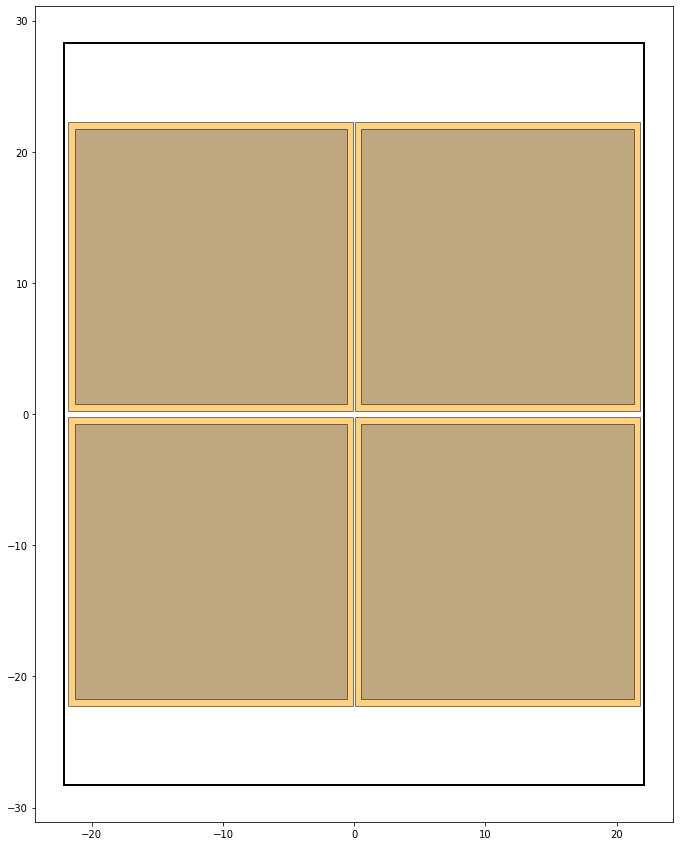

In [3]:
plt.rcParams['figure.figsize'] = [15, 15]

pm = m.getPolygon()
plt.gca().add_patch(pm)

for sen in m.sensors:
    plt.gca().add_patch(sen.getPolygon())
    plt.gca().add_patch(sen.getPolygon(active=True))
    
plt.axis('scaled')
plt.show()

## Populate the disks with sensors and modules

First, we create super modules out of N modules, power and readout boards.
The smallest entity will probably contain 3 modules, so let's use them as starting point.
We assume a gap of 0.5 mm between the modules.
The power board can be either above or below the modules, which is set with the orientation parameter.

Then, we can create a dee with inner/outer radius of 315 and 1185mm.



In [11]:
r_inner = 315
r_outer = 1185

module_gap = 0.5

edge_x = 6  # 6mm is the default

detector = {}

SM = SuperModule(m, pb, rb, n_modules=3, module_gap=module_gap, orientation='above')

detector['disk1_front'] = Dee(r_inner, r_outer)
detector['disk1_front'].populate(SM, edge_x=edge_x, center_RB=True)

SM = SuperModule(m, pb, rb, n_modules=3, module_gap=module_gap, orientation='above')

detector['disk1_back'] = Dee(315, 1185)
detector['disk1_back'].populate(SM, edge_x=edge_x, center_PB=True)

SM = SuperModule(m, pb, rb, n_modules=3, module_gap=module_gap, orientation='below')

detector['disk2_front'] = Dee(315, 885)
detector['disk2_front'].populate(SM, edge_x=edge_x, center_RB=True)

SM = SuperModule(m, pb, rb, n_modules=3, module_gap=module_gap, orientation='below')

detector['disk2_back'] = Dee(315, 885)
detector['disk2_back'].populate(SM, edge_x=edge_x, center_PB=True)



## Supermodule

We can then look at one of the previously created super modules.
The last one we created has the power board below the modules, and contains 3 modules.
Let's see if this is actually the case.


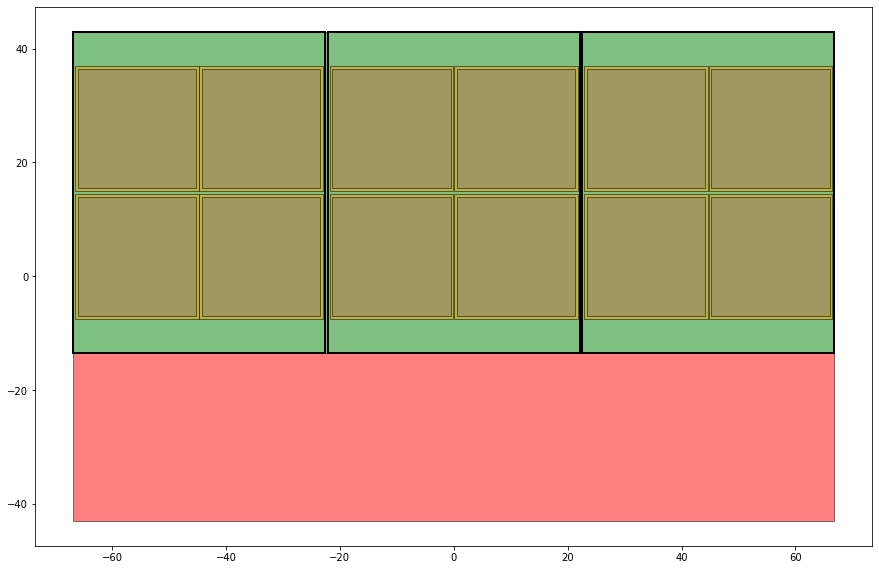

In [12]:
plt.rcParams['figure.figsize'] = [15, 15]

#plt.gca().add_patch(SM.getPolygon())
plt.gca().add_patch(SM.PB.getPolygon())
plt.gca().add_patch(SM.RB.getPolygon())

for mod in SM.modules:
    plt.gca().add_patch(mod.getPolygon())
    for sen in mod.sensors:
        plt.gca().add_patch(sen.getPolygon())
        plt.gca().add_patch(sen.getPolygon(active=True))

plt.axis('scaled')
plt.show()

## Active area of the full detector

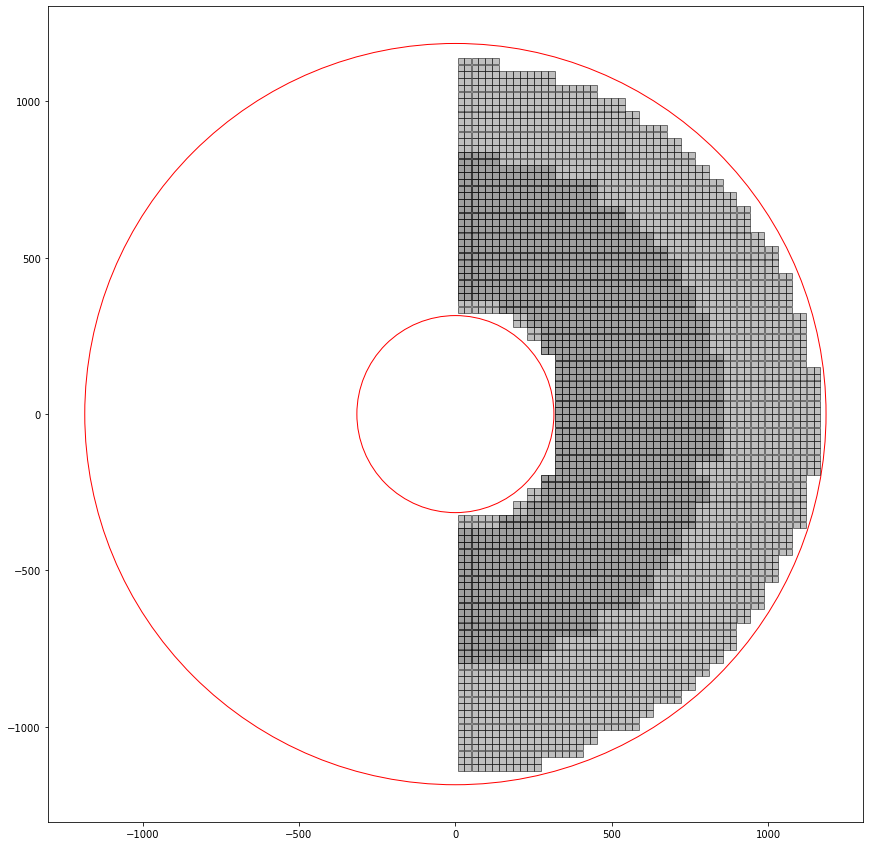

In [13]:
inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')

plt.rcParams['figure.figsize'] = [15, 15]

plt.gca().add_patch(inner)
plt.gca().add_patch(outer)

for dee in detector:
    for slot in detector[dee].slots_flat:
        if slot.covered:
            #plt.gca().add_patch(slot.getPolygon())
            #plt.gca().add_patch(slot.RB.getPolygon())
            #plt.gca().add_patch(slot.PB.getPolygon())
            for mod in slot.modules:
                for sen in mod.sensors:
                    plt.gca().add_patch(sen.getPolygon(active=True))


#plt.savefig('test.pdf')
        
plt.axis('scaled')
plt.show()

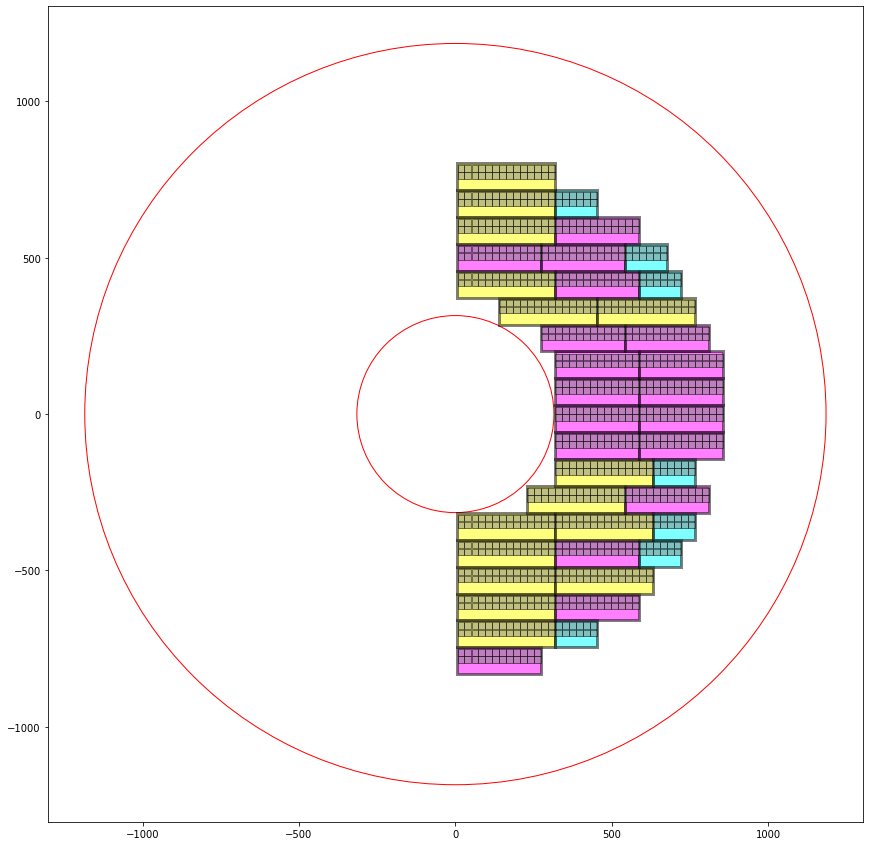

In [14]:

inner = plt.Circle((0, 0), 315,fill=None, edgecolor='r')
outer = plt.Circle((0, 0), 1185,fill=None, edgecolor='r')

plt.rcParams['figure.figsize'] = [15, 15]

plt.gca().add_patch(inner)
plt.gca().add_patch(outer)

for SM in detector['disk2_front'].supermodules:
    plt.gca().add_patch(SM.getPolygon())

for slot in detector['disk2_front'].slots_flat:
    if slot.covered:
        for mod in slot.modules:
            for sen in mod.sensors:
                plt.gca().add_patch(sen.getPolygon(active=True))

#plt.savefig('test.pdf')
        
plt.axis('scaled')
plt.show()

# Throwing random coordinates

In [15]:
z_ref = 2.99825
z = [
    2.99825,
    3.0055,
    3.02075,
    3.0285,
]

In [16]:
import time
import random

starttime = time.time()

eta_max = 2.950
eta_min = 1.659
eta_range = eta_max-eta_min

nEvents = int(1e5)

eta = np.random.rand(nEvents)*eta_range + eta_min
phi = np.random.rand(nEvents)*np.pi - np.pi/2

vec = three_vector.fromEtaPhi(eta, phi, np.ones(nEvents)*z_ref*1000)

vec_list = []
for x,y in zip(vec.x, vec.y):
    vec_list.append(three_vector(x,y,z_ref*1000))

hits = {
    'baseline':[],
    
       }
   
nHits = {
    'baseline':[],
}

detector_variants = {
    'baseline': detector,
    'remove_face': detector_remove,
    ''
        }

layers = ['disk1_front', 'disk1_back', 'disk2_front', 'disk2_back']


for v in vec_list:    
    for det in detector_variants:
        n = 0
        iLayer = 0
        nModules = 0

        for layer in layers:
            x_shift = 1000*(z[iLayer]-z_ref)*np.tan(v.theta)*np.cos(v.phi)
            y_shift = 1000*(z[iLayer]-z_ref)*np.tan(v.theta)*np.sin(v.phi)
            x,y = ((v.x + x_shift), (v.y + y_shift))
                
            if detector_variants[det][layer].intersect(x, y):
                n += 1
            iLayer += 1
            
            nModules += sum( [ sum([ x for x in row if x==1]) for row in detector_variants[det][layer].module_matrix ])
            
        if n>0: hits[det].append(v)
        nHits[det].append(n)
        
print ("Detector option %s:"%det)
print (" - Number of modules: %s"%(nModules*4))
    
    

endtime = time.time()

print (endtime-starttime)

Detector option small_sensor:
 - Number of modules: 5716
20.999574899673462


In [17]:
from yahist import Hist1D

from yahist.utils import fit_hist, ignore_division_errors
import scipy

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


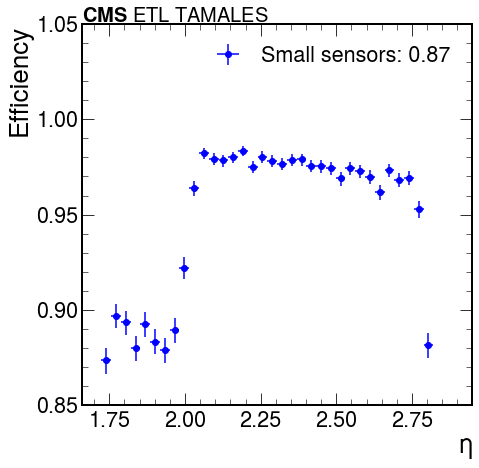

In [18]:
import os
import mplhep as hep

plt.style.use(hep.style.CMS)  # or ATLAS/LHCb

bins = "40,1.659,2.950"

num = Hist1D([v.eta for v in hits['small_sensor']], bins=bins)
den = Hist1D([v.eta for v in vec_list], bins=bins)

fig, ax = plt.subplots(1,1,figsize=(7,7))

h = num.divide(den, binomial=True)

h.plot(show_errors=True, color="blue", label='Small sensors: %.2f'%(len(hits['small_sensor'])/len(vec_list)))

ax.set_ylabel('Efficiency')
ax.set_xlabel(r'$\eta$')

ax.set_ylim(0.85,1.05)

fig.text(0.0, 0.995, '$\\bf{CMS}$ ETL TAMALES', fontsize=20,  horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes )

name = 'efficiency_examples'

fig.savefig(os.path.join("{}.pdf".format(name)))
fig.savefig(os.path.join("{}.png".format(name)))

'texgyreheros-bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


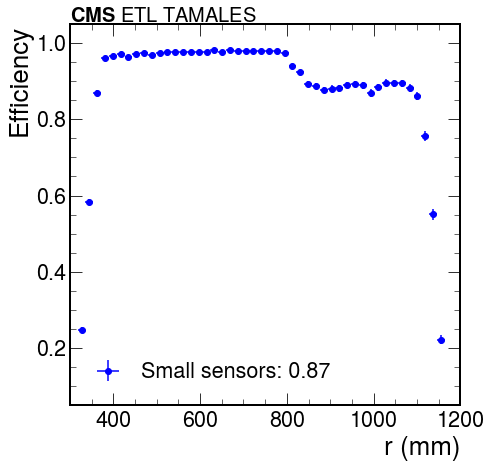

In [19]:
bins = "50,300,1200"

num = Hist1D([v.r for v in hits['small_sensor']], bins=bins)
den = Hist1D([v.r for v in vec_list], bins=bins)

fig, ax = plt.subplots(1,1,figsize=(7,7))

h = num.divide(den, binomial=True)

h.plot(show_errors=True, color="blue", label='Small sensors: %.2f'%(len(hits['small_sensor'])/len(vec_list)))

ax.set_ylabel('Efficiency')
ax.set_xlabel('r (mm)')

ax.set_ylim(0.05,1.05)

fig.text(0.0, 0.995, '$\\bf{CMS}$ ETL TAMALES', fontsize=20,  horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes )

name = 'efficiency_vs_r'

fig.savefig(os.path.join("{}.pdf".format(name)))
fig.savefig(os.path.join("{}.png".format(name)))

In [20]:
h

[ 0.00 ± 0.00    0.25 ± 0.01    0.58 ± 0.01    0.87 ± 0.01    0.96 ± 0.00
  0.97 ± 0.00    0.97 ± 0.00    0.97 ± 0.00    0.97 ± 0.00    0.98 ± 0.00
  0.97 ± 0.00    0.98 ± 0.00    0.98 ± 0.00    0.98 ± 0.00    0.98 ± 0.00
  0.98 ± 0.00    0.98 ± 0.00    0.98 ± 0.00    0.98 ± 0.00    0.98 ± 0.00
  0.98 ± 0.00    0.98 ± 0.00    0.98 ± 0.00    0.98 ± 0.00    0.98 ± 0.00
  0.98 ± 0.00    0.98 ± 0.00    0.97 ± 0.00    0.94 ± 0.01    0.92 ± 0.01
  0.89 ± 0.01    0.89 ± 0.01    0.88 ± 0.01    0.88 ± 0.01    0.88 ± 0.01
  0.89 ± 0.01    0.89 ± 0.01    0.89 ± 0.01    0.87 ± 0.01    0.88 ± 0.01
  0.90 ± 0.01    0.90 ± 0.01    0.89 ± 0.01    0.88 ± 0.01    0.86 ± 0.01
  0.76 ± 0.01    0.55 ± 0.02    0.22 ± 0.01    0.04 ± 0.01     nan ±  nan]

In [21]:
test = Hist1D(nHits['small_sensor'], bins="5,-0.5,4.5")
test

bin,content
"(-0.5,0.5)",13130 ± 114.586
"(0.5,1.5)",35252 ± 187.755
"(1.5,2.5)",49954 ± 223.504
"(2.5,3.5)",1633 ± 40.4104
"(3.5,4.5)",31 ± 5.56776


In [22]:
np.mean(nHits['small_sensor'])

1.40183

In [23]:
df = pd.DataFrame(nHits)

In [24]:
len(df['small_sensor'][df['small_sensor']>1])/len(nHits['small_sensor'])

0.51618

## Potential descoping

In [138]:
d = detector_variants['small_sensor']['disk2_back']
filled_slots = sum( [ sum([ x for x in row if x==1]) for row in d.module_matrix ])
filled_slots*2 # rough estimate of total number of modules

7696

In [81]:
SM = SuperModule(m, pb, rb, n_modules=3, module_gap=module_gap, orientation='above')

descoped = Dee(315, 1080)
descoped.populate(SM, edge_x=6, center_PB=True)

filled_slots = sum( [ sum([ x for x in row if x==1]) for row in descoped.module_matrix ])
filled_slots

385

In [76]:
0.8*481

384.8

In [25]:
nHits['small_sensor']

[3,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 1,
 0,
 2,
 1,


In [27]:
eta_list = [v.eta for v in vec_list]
eta_list

[2.61179659782756,
 2.1804471728671837,
 2.1753125277841066,
 2.9213517793212245,
 1.678951394571317,
 2.351471744808133,
 2.5996192711135064,
 2.3706255089918056,
 2.7460030079345565,
 2.052491286475457,
 2.658122295303294,
 2.4161016530608235,
 2.1299085604749033,
 2.813692415330335,
 2.6609038317765994,
 2.9110938453789315,
 2.292193354067548,
 2.509127166931252,
 2.3670713975470914,
 2.2823439385547672,
 2.440803530170247,
 2.0689577949635782,
 2.159731159353742,
 2.05814426258625,
 1.907210753344227,
 1.766850798837849,
 2.8194709192513168,
 1.7041694606501268,
 1.9547244463073685,
 2.527824250618657,
 1.7922277550611454,
 2.434660146812513,
 2.771195393951911,
 1.9924476304174479,
 2.938501082942702,
 2.7843355113327695,
 2.57220234015342,
 2.945498436194773,
 2.169506524425931,
 1.8771504607124363,
 2.860209602312848,
 1.978740884664534,
 2.2073818655669846,
 2.6796522532661884,
 2.401772870665969,
 2.071692914036827,
 2.310858152693807,
 1.837038699641729,
 2.7233364832079676,


In [29]:
from yahist import Hist2D

In [43]:
mean_hit = np.column_stack((eta_list, nHits['small_sensor']))
mean_hit

array([[2.6117966 , 3.        ],
       [2.18044717, 2.        ],
       [2.17531253, 1.        ],
       ...,
       [2.0260428 , 1.        ],
       [2.54192749, 2.        ],
       [2.6737412 , 0.        ]])

In [47]:
mean_2d = Hist2D(mean_hit, bins="20,1.659,2.950,5,-0.5,4.5")
mean_2d

[[2933.00 ± 54.16   571.00 ± 23.90   567.00 ± 23.81   563.00 ± 23.73
  593.00 ± 24.35   282.00 ± 16.79   95.00 ± 9.75   103.00 ± 10.15
  103.00 ± 10.15   103.00 ± 10.15   112.00 ± 10.58   113.00 ± 10.63
  127.00 ± 11.27   139.00 ± 11.79   141.00 ± 11.87   161.00 ± 12.69
  158.00 ± 12.57   424.00 ± 20.59   1858.00 ± 43.10   3984.00 ± 63.12]
 [2064.00 ± 45.43   4286.00 ± 65.47   4304.00 ± 65.60   4343.00 ± 65.90
  4239.00 ± 65.11   1925.00 ± 43.87   1035.00 ± 32.17   930.00 ± 30.50
  950.00 ± 30.82   861.00 ± 29.34   945.00 ± 30.74   935.00 ± 30.58
  883.00 ± 29.72   810.00 ± 28.46   767.00 ± 27.69   860.00 ± 29.33
  922.00 ± 30.36   1846.00 ± 42.97   1809.00 ± 42.53   538.00 ± 23.19]
 [21.00 ± 4.58   110.00 ± 10.49   131.00 ± 11.45   110.00 ± 10.49
  275.00 ± 16.58   2647.00 ± 51.45   3703.00 ± 60.85   3778.00 ± 61.47
  3834.00 ± 61.92   3829.00 ± 61.88   3852.00 ± 62.06   3756.00 ± 61.29
  3963.00 ± 62.95   3851.00 ± 62.06   3877.00 ± 62.27   3848.00 ± 62.03
  3866.00 ± 62.18   2745.00 ± 52.39   1259.00 ± 35.48   499.00 ± 22.34]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
   2.00 ± 1.41   77.00 ± 8.77   111.00 ± 10.54   180.00 ± 13.42
  137.00 ± 11.70   181.00 ± 13.45   115.00 ± 10.72   181.00 ± 13.45
  102.00 ± 10.10   121.00 ± 11.00   132.00 ± 11.49   89.00 ± 9.43
  109.00 ± 10.44   70.00 ± 8.37   16.00 ± 4.00   10.00 ± 3.16]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
   0.00 ± 0.00    3.00 ± 1.73    0.00 ± 0.00    2.00 ± 1.41
   2.00 ± 1.41    1.00 ± 1.00    0.00 ± 0.00    3.00 ± 1.73
   4.00 ± 2.00    1.00 ± 1.00    1.00 ± 1.00    3.00 ± 1.73
   7.00 ± 2.65    1.00 ± 1.00    3.00 ± 1.73    0.00 ± 0.00]]

In [50]:
mean_profile = mean_2d.profile(axis='x')

<AxesSubplot:>

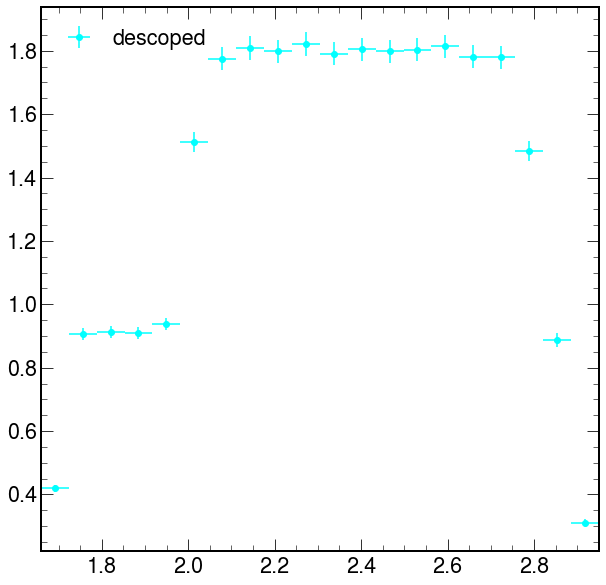

In [51]:
mean_profile.plot(show_errors=True, color="cyan", label='descoped')

In [ ]:
bins = "5,-0.5,4.5"

h = Hist1D(nHits['small_sensor'], bins=bins)


fig, ax = plt.subplots(1,1,figsize=(7,7))

h.plot(color="blue", histtype="step", linewidth=2, label='small sensor, mean %.2f'%h.mean())

ax.set_ylabel('Tracks')
ax.set_xlabel('Hits')

ax.set_ylim(0,nEvents*1.5)

fig.text(0.0, 0.995, '$\\bf{CMS}$ ETL TAMALES', fontsize=20,  horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes )

name = 'nHits'

fig.savefig(os.path.join("{}.pdf".format(name)))
fig.savefig(os.path.join("{}.png".format(name)))

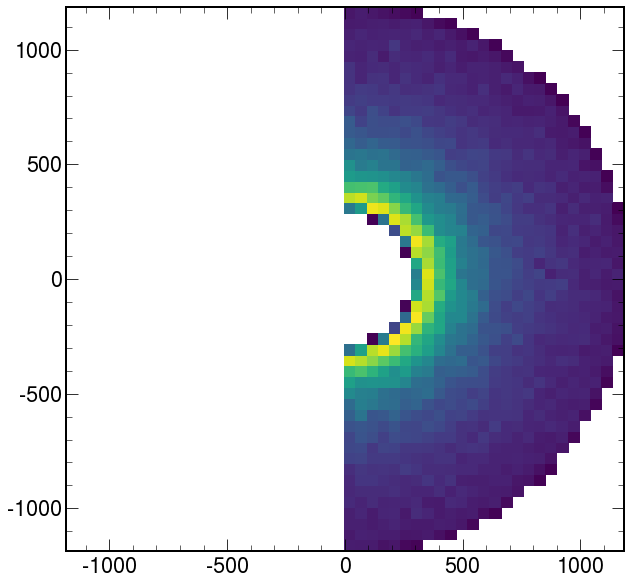

In [43]:
h_all, x_edge, y_edge, img = plt.hist2d([v.x for v in vec_list], [v.y for v in vec_list], bins=[50,50], range=[[-1185,1185], [-1185,1185]], cmin = 0.0001)

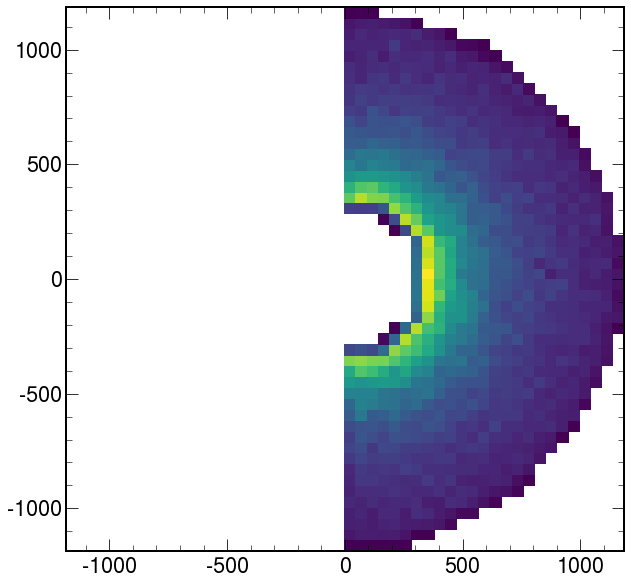

In [44]:
h_small_sensor, x_edge, y_edge, img = plt.hist2d([v.x for v in hits['small_sensor']], [v.y for v in hits['small_sensor']], bins=[50,50], range=[[-1185,1185], [-1185,1185]], cmin = 0.0001)

ValueError: 'low' is not a valid value for origin; supported values are 'upper', 'lower'

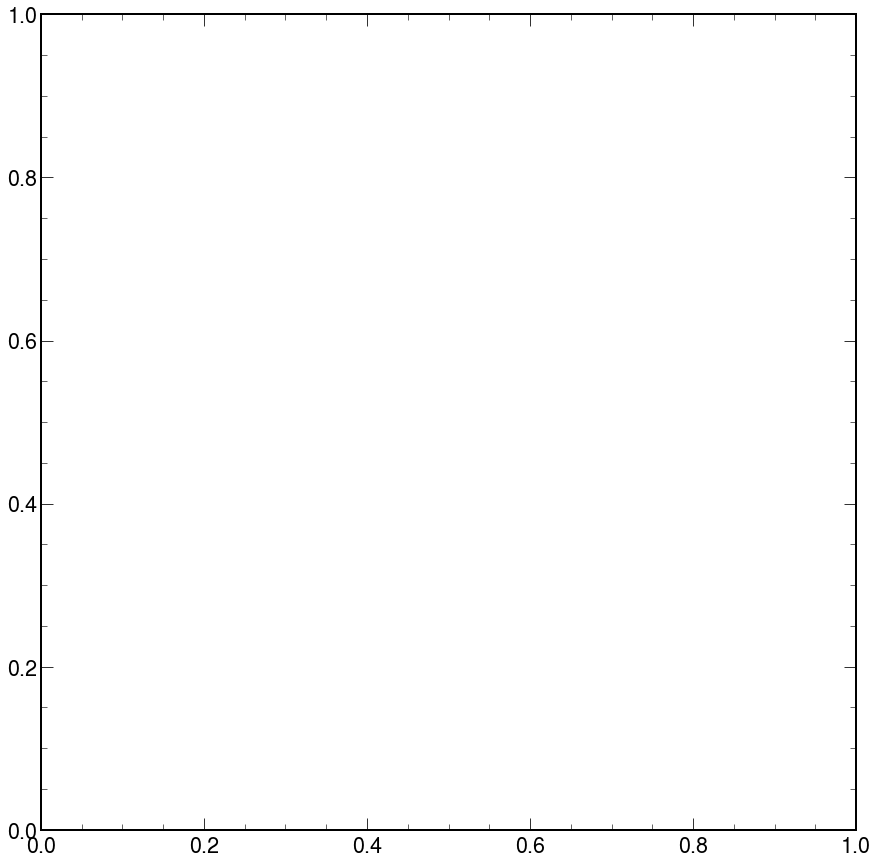

In [45]:
# TAMALES efficiencies
#H = np.nan_to_num(h_TAMALES_passed/h_all, -1)
H = h_small_sensor/h_all
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(H.T, interpolation='nearest', origin='low',extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]])


